In [1]:
import pandas as pd
import numpy as np
import plotly 
import os
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [174]:
outputDir = '.'

X_df = pd.read_pickle('factor.pkl')
X_df.head()

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,标普500_pctChange5,日经225_pctChange5,上证综指_pctChange5,ETFVolatility60,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,,,,,,,,,,,,,,,,,,,
2007-09-03,1.8289,2.4612,2.4713,NaN,NaN,NaN,1.8197,2.4963,2.7768,2.9081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.934243e+10,NaN,NaN
2007-09-04,1.8828,2.1780,2.1805,NaN,NaN,NaN,1.8860,2.2348,2.7740,2.9625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.833770e+10,NaN,NaN
2007-09-05,1.8201,2.3618,2.3678,NaN,NaN,NaN,1.8122,2.3683,2.9631,3.0903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.494567e+10,NaN,NaN
2007-09-06,1.8173,2.4748,2.4389,NaN,NaN,NaN,1.8198,2.4385,3.2259,3.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.626460e+10,NaN,NaN
2007-09-07,2.0160,2.8528,2.8629,NaN,NaN,NaN,2.0446,2.8066,3.5218,3.4738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.825542e+10,NaN,NaN


IBO001                          211
R007                            211
B0                              211
IBO001_pctChange5               216
R007_pctChange5                 216
B0_pctChange5                   216
SHIBORO/N                       211
SHIBOR1W                        211
SHIBOR2W                        211
SHIBOR1M                        211
SHIBOR3M                        211
SHIBOR6M                        211
SHIBORO/N_pctChange5            216
SHIBOR1W_pctChange5             216
SHIBOR2W_pctChange5             216
SHIBOR1M_pctChange5             216
SHIBOR3M_pctChange5             216
SHIBOR6M_pctChange5             216
国债到期收益率:6个月                     211
国债到期收益率:1年                      211
国债到期收益率:2年                      211
国债到期收益率:6个月_pctChange5          291
国债到期收益率:1年_pctChange5           283
国债到期收益率:2年_pctChange5           283
南华综合指数                           82
CRB现货指数:综合                       82
期货收盘价(连续):COMEX黄金                82
期货结算价(连续):布伦特原油             

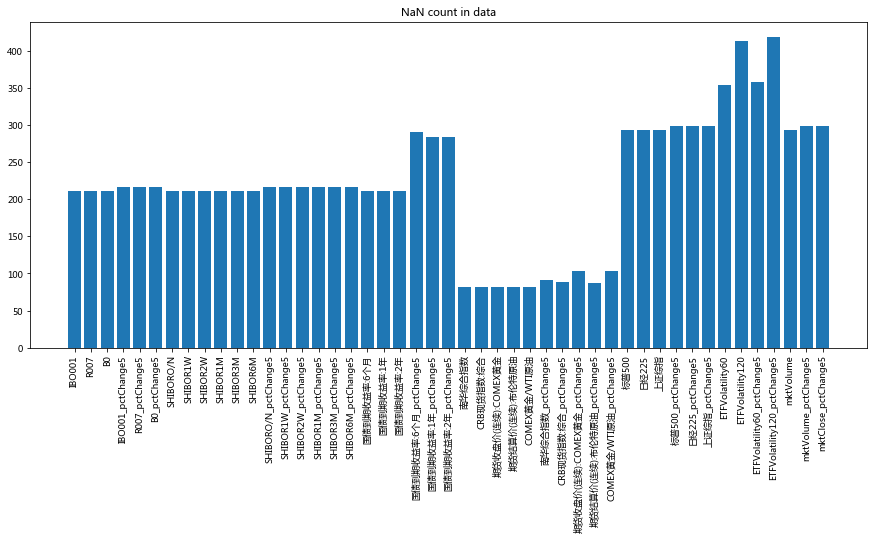

In [81]:
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 

nas_df = X_df.isna()
print(X_df.isna().sum())

plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

国债到期收益率:6个月_pctChange5           8
CRB现货指数:综合_pctChange5            1
期货收盘价(连续):COMEX黄金_pctChange5    16
COMEX黄金/WTI原油_pctChange5        16
dtype: int64


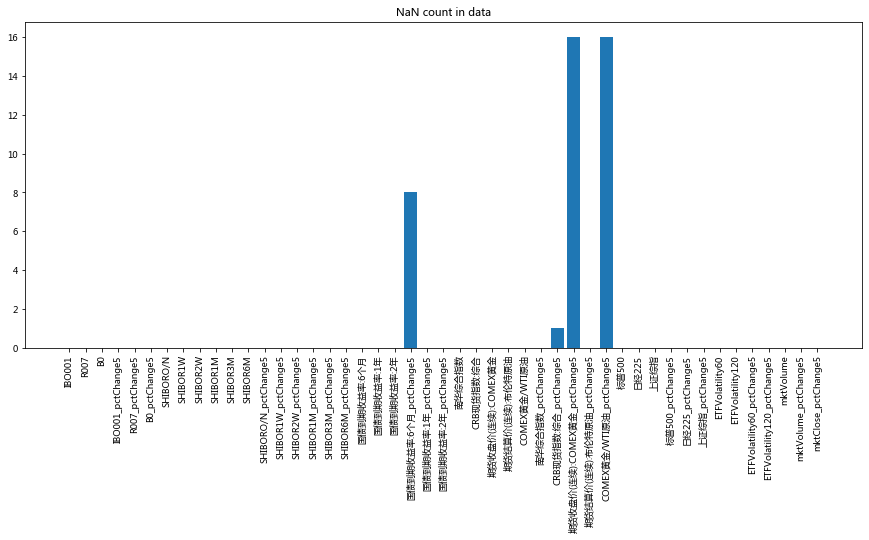

In [91]:
XDroped_df = X_df.loc['2008-04':].dropna(axis = 0, thresh=25)

print(XDroped_df.isna().sum()[XDroped_df.isna().sum()>0])
nas_df = XDroped_df.isna()
plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

他有幾天 原油跟黃金都 0 
国债到期收益率:6个月 也會有 0 pct_change 遇到倆倆都 0 就 nan 了

In [124]:
XFilled_df = XDroped_df.fillna(method = 'ffill')
# for date in XDroped_df.loc[XDroped_df.IBO001.isna()].index: print(date)
# XDroped_df.ix[XDroped_df['国债到期收益率:6个月_pctChange5'].isna(), 25:]

XFilled_df.head()

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,标普500_pctChange5,日经225_pctChange5,上证综指_pctChange5,ETFVolatility60,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,2.5561,3.0938,3.0937,0.249621,0.298171,0.298238,2.5914,3.1008,2.9951,3.3039,...,0.009571,-0.001217,-0.082779,0.000812,0.000623,0.116756,0.061890,8.132457e+09,0.044804,-0.095947
2008-04-02,2.3647,3.1501,3.1493,0.138901,0.279592,0.280464,2.3718,3.1539,3.6907,3.3183,...,0.020265,0.017928,-0.071801,0.000816,0.000622,0.130007,0.063483,9.233396e+09,0.347541,-0.113417
2008-04-03,2.3489,2.7830,2.7917,0.129768,0.166974,0.171162,2.3610,2.7796,3.6332,3.3685,...,0.033762,0.027015,0.010186,0.000835,0.000630,0.122711,0.055455,7.351010e+09,-0.074038,-0.047096
2008-04-07,2.3274,3.2303,3.2330,0.028458,0.351138,0.354931,2.3238,3.2093,3.5210,3.5117,...,0.041841,0.019159,0.005439,0.000869,0.000646,0.096784,0.043617,8.805947e+09,-0.040062,-0.034606
2008-04-08,2.3486,3.5846,3.5853,0.023846,0.240174,0.240288,2.3385,3.4941,3.9874,3.6742,...,0.029814,0.030343,0.040264,0.000864,0.000638,0.087797,0.023199,9.586918e+09,0.385330,0.012665


In [125]:
print(np.isfinite(XFilled_df).all())
for aColumn in XFilled_df.columns:
    print(aColumn, XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn])
    XFilled_df.loc[np.isinf(XFilled_df)[aColumn], aColumn] = XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn]

IBO001                           True
R007                             True
B0                               True
IBO001_pctChange5                True
R007_pctChange5                  True
B0_pctChange5                   False
SHIBORO/N                        True
SHIBOR1W                         True
SHIBOR2W                         True
SHIBOR1M                         True
SHIBOR3M                         True
SHIBOR6M                         True
SHIBORO/N_pctChange5            False
SHIBOR1W_pctChange5             False
SHIBOR2W_pctChange5             False
SHIBOR1M_pctChange5             False
SHIBOR3M_pctChange5             False
SHIBOR6M_pctChange5             False
国债到期收益率:6个月                      True
国债到期收益率:1年                       True
国债到期收益率:2年                       True
国债到期收益率:6个月_pctChange5          False
国债到期收益率:1年_pctChange5           False
国债到期收益率:2年_pctChange5           False
南华综合指数                           True
CRB现货指数:综合                       True
期货收盘价(连续):CO

# 去個極值呀˙˙
![image](https://i2.kknews.cc/SIG=3rto9q7/5r8200046s68q2o6q7q5.jpg)

In [175]:
def cutExtreme(XFilled_df, n = 3.5):
    MAD_s = XFilled_df.mad()
    upper_s = XFilled_df.median()+n*MAD_s
    lower_s = XFilled_df.median()-n*MAD_s
    X_df = XFilled_df

    for aColumn in X_df.columns:
        X_df.loc[X_df[aColumn]>upper_s[aColumn], aColumn] = upper_s[aColumn]
        X_df.loc[X_df[aColumn]<lower_s[aColumn], aColumn] = lower_s[aColumn]

    XNoExtreme_df = X_df
    return(XNoExtreme_df)

XNoExtreme_df = cutExtreme(XFilled_df, n = 3.5)

XNoExtreme_df.to_csv(os.path.join(outputDir, 'cleanedFactor.csv'))
XNoExtreme_df.to_pickle(os.path.join(outputDir, 'cleanedFactor.pkl'))

# 突然發現不能這麼幹呀

必須要切好 train test 才能這麼幹呢
那就先存好上面的資料囉，我們這下面的東西就是康康一下哈

In [140]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [168]:
scaler = StandardScaler().fit(XNoExtreme_df)
XTmp_df = pd.DataFrame(scaler.transform(XNoExtreme_df), index=XNoExtreme_df.index, columns=XNoExtreme_df.columns)
XTmp_df

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,标普500_pctChange5,日经225_pctChange5,上证综指_pctChange5,ETFVolatility60,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,0.227569,0.126744,0.128354,1.737625,1.830776,1.828434,0.313719,0.267254,-0.173777,-0.162882,...,0.349997,-0.111995,-2.543708,2.208035,1.278906,1.075466,1.153958,-1.172090,0.037225,-2.612391
2008-04-02,-0.009852,0.183777,0.184661,0.954789,1.712980,1.715840,0.039638,0.324265,0.453043,-0.151345,...,0.859486,0.710970,-2.209102,2.227833,1.278000,1.197509,1.182611,-1.112329,1.141263,-2.612391
2008-04-03,-0.029451,-0.188105,-0.177484,0.890213,0.998922,1.023450,0.026159,-0.077603,0.401229,-0.111129,...,1.502466,1.101562,0.289738,2.304740,1.310055,1.130314,1.038165,-1.214508,-0.396176,-1.339984
2008-04-07,-0.056121,0.265022,0.269425,0.173911,2.166616,2.187568,-0.020270,0.383745,0.300123,0.003594,...,1.887347,0.763861,0.145040,2.357550,1.372402,0.891527,0.825145,-1.135532,-0.272270,-1.000299
2008-04-08,-0.029823,0.623938,0.626202,0.141302,1.463050,1.461339,-0.001923,0.689521,0.720406,0.133778,...,1.314390,1.244612,1.206460,2.357550,1.341079,0.808760,0.457727,-1.093140,1.279075,0.285348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,-0.727822,-0.687223,-0.691332,0.791237,-0.184089,-0.200483,-0.781357,-0.776120,-1.024525,-0.991173,...,-2.391977,-2.613304,-0.627054,-0.292213,-0.675133,1.626393,1.890911,2.530604,-0.462972,-0.760693
2020-03-03,-0.843928,-0.735444,-0.735183,0.056406,-0.316928,-0.323373,-0.896182,-0.813698,-1.079493,-1.024019,...,-2.473447,-2.437823,-0.224589,-0.303673,-0.675162,1.539394,1.825328,2.530604,-0.625463,-0.541967
2020-03-04,-1.030863,-0.810711,-0.813667,-0.178553,-0.494974,-0.497287,-1.095877,-0.858791,-1.102923,-1.068082,...,-0.313658,-1.717024,0.221401,-0.309729,-0.673212,1.507569,2.142598,2.530604,-1.038275,0.103022


In [169]:
import pandas_profiling 
X_df = XTmp_df
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="standardScaledReport.html")
profile

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 22269 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20538 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21040 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26399 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\ProgramDa

Number of variables,48
Number of observations,2903
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,384.0 B
Numeric,32
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,15


In [171]:
scaler = MinMaxScaler().fit(XNoExtreme_df)
XTmp_df = pd.DataFrame(scaler.transform(XNoExtreme_df), index=XNoExtreme_df.index, columns=XNoExtreme_df.columns)
XTmp_df

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,标普500_pctChange5,日经225_pctChange5,上证综指_pctChange5,ETFVolatility60,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,0.465317,0.477076,0.477075,0.873042,0.877260,0.877706,0.481286,0.518000,0.403973,0.389489,...,0.555596,0.471028,0.012301,0.956598,0.670582,0.721073,0.731016,0.051689,0.501904,0.000000
2008-04-02,0.414416,0.489165,0.489014,0.707782,0.853837,0.855299,0.422260,0.530394,0.538418,0.391937,...,0.653716,0.626002,0.075634,0.962345,0.670322,0.745026,0.736735,0.066995,0.717416,0.000000
2008-04-03,0.410214,0.410336,0.412228,0.694149,0.711856,0.717507,0.419358,0.443030,0.527304,0.400473,...,0.777544,0.699555,0.548602,0.984670,0.679522,0.731838,0.707902,0.040826,0.417303,0.239700
2008-04-07,0.404496,0.506387,0.506986,0.542935,0.944037,0.949177,0.409359,0.543325,0.505618,0.424823,...,0.851666,0.635962,0.521214,1.000000,0.697415,0.684974,0.665381,0.061053,0.441490,0.303691
2008-04-08,0.410134,0.582467,0.582634,0.536051,0.804142,0.804651,0.413310,0.609799,0.595764,0.452454,...,0.741323,0.726494,0.722115,1.000000,0.688425,0.668730,0.592041,0.071910,0.744317,0.545886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,0.260489,0.304537,0.303277,0.673255,0.476629,0.473933,0.245454,0.291175,0.221498,0.213687,...,0.027534,0.000000,0.375076,0.230804,0.109792,0.829198,0.878119,1.000000,0.404264,0.348829
2020-03-03,0.235597,0.294315,0.293979,0.518129,0.450216,0.449477,0.220726,0.283006,0.209708,0.206715,...,0.011844,0.033045,0.451253,0.227478,0.109784,0.812124,0.865028,1.000000,0.372546,0.390034
2020-03-04,0.195520,0.278360,0.277338,0.468528,0.414814,0.414867,0.177720,0.273203,0.204683,0.197363,...,0.427786,0.168781,0.535668,0.225720,0.110344,0.805878,0.928358,1.000000,0.291964,0.511539


In [173]:
X_df = XTmp_df
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="minMaxScaledReport.html")
profile

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 22269 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20538 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21040 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26399 missing from current font.

C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\ProgramDa

Number of variables,48
Number of observations,2903
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,384.0 B
Numeric,32
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,15
